In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
x = pd.read_csv("xdata.csv",index_col=[0])
y = pd.read_csv("ydata.csv",index_col=[0])

X_data,y_data = x.values,y.values.reshape(-1)
print(X_data.shape,y_data.shape)

(399, 2) (399,)


In [7]:
# split = 0.8
# x_train,x_test = X_data[:int(split*len(X_data))],X_data[int(split*len(X_data)):]
# y_train,y_test = y_data[:int(split*len(X_data))],y_data[int(split*len(X_data)):]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2)

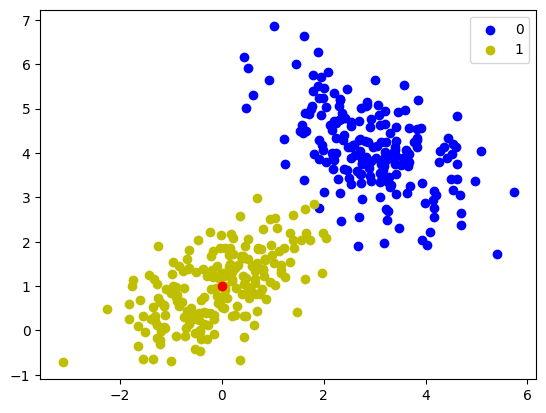

In [21]:
plt.scatter(X_data[y_data == 0][:,0],X_data[y_data == 0][:,1],c='blue',label = '0')
plt.scatter(X_data[y_data == 1][:,0],X_data[y_data == 1][:,1],c='y',label = '1')
plt.scatter(0,1,c='r')
plt.legend()
plt.show()

In [22]:
T = np.array([0,1])
T

array([0, 1])

In [10]:
def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

In [13]:
k = 5
def predict_1(t):
    dist = []
    for i in range(X_data.shape[0]):
        dist.append(distance(t,X_data[i]))

    kPoints = np.argsort(dist)[:k]
    labels,counts = np.unique(y_data[kPoints],return_counts=True)

    return labels[np.argmax(counts)]
    

In [12]:
l = [1,2,1,1,3,2]
np.unique(l,return_counts=True)

(array([1, 2, 3]), array([3, 2, 1], dtype=int64))

In [23]:
predict_1(T)

1.0

In [24]:
class KNNClassifier:
    def __init__(self,k = 5):
        self.k = k
        
    def fit(self,x,y):
        self.X = x
        self.y = y
        
    def distance_formula(self,p1,p2):
        return np.sqrt(np.sum((p1-p2)**2))
        
    def predict_1(self,t):
        dist = []
        for p in self.X:
            dist.append(distance(t,p))
    
        knear = np.argsort(dist)[:k]
        klabels = []
        for p in knear:
            klabels.append(self.y[p])
    
        labels,counts = np.unique(klabels,return_counts=True)
        predLabel = labels[np.argmax(counts)]
        prob = np.max(counts)/self.k
        # print("Probability:", prob)
        
        return predLabel 
        # For Regression return np.mean(klables)

    def predict(self,t):
        predictions = []
        for i in range(len(t)):
            predictions.append(self.predict_1(t[i]))
        return np.array(predictions)

    def accuracy(ytrue,ypred):
        return np.mean(ytrue==ypred)
        

In [25]:
clf = KNNClassifier(k=5)
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)
KNNClassifier.accuracy(y_test,ypred)

0.9875